In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv("student_spending (1).csv")

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split the dataset into features and target variable
X = df.drop(columns=['preferred_payment_method_Mobile Payment App'])
y = df['preferred_payment_method_Mobile Payment App']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.73      0.75       133
        True       0.51      0.57      0.54        67

    accuracy                           0.68       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.68      0.68      0.68       200



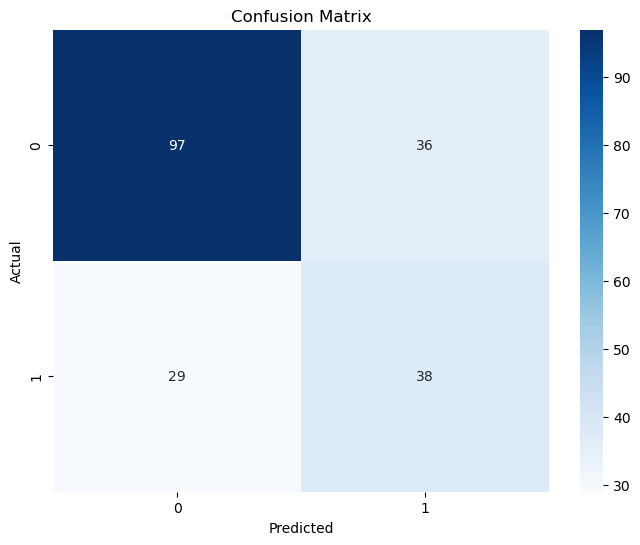

In [5]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Coefficients of the logistic regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Logistic Regression Coefficients:")
print(coefficients)

Logistic Regression Coefficients:
                                       Feature  Coefficient
22                            major_Psychology     0.203327
16                       year_in_school_Junior     0.151590
17                       year_in_school_Senior     0.138554
20                             major_Economics     0.100534
1                                          age     0.010042
13                               miscellaneous     0.003133
5                                      housing     0.000740
3                                financial_aid     0.000498
2                               monthly_income     0.000206
0                                   Unnamed: 0     0.000090
11                                  technology    -0.000052
4                                      tuition    -0.000076
6                                         food    -0.000235
10                               personal_care    -0.000872
8                               books_supplies    -0.000948
12    

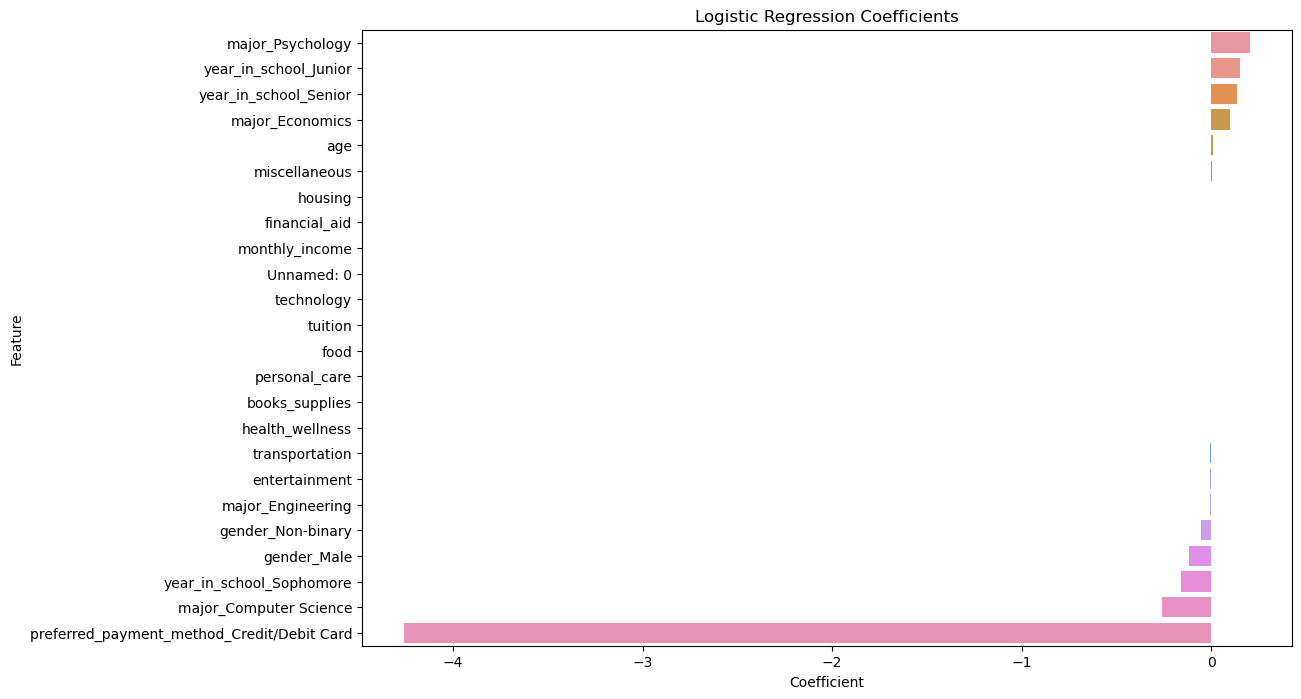

In [7]:
# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [8]:

# Prediction on new data
new_data = pd.DataFrame({
    'age': [20, 21, 22],
    'monthly_income': [1200, 1100, 1000],
    'financial_aid': [500, 600, 700],
    'housing': [700, 750, 800],
    'food': [300, 350, 400],
    'transportation': [150, 160, 170],
    'books_supplies': [200, 210, 220],
    'entertainment': [100, 110, 120],
    'personal_care': [70, 80, 90],
    'technology': [250, 260, 270],
    'health_wellness': [150, 160, 170],
    'miscellaneous': [100, 110, 120],
    'gender_Male': [1, 0, 0],
    'gender_Non-binary': [0, 0, 1],
    'year_in_school_Junior': [1, 0, 0],
    'year_in_school_Senior': [0, 1, 0],
    'major_Computer Science': [1, 0, 0],
    'major_Economics': [0, 1, 0],
    'major_Psychology': [0, 0, 1]
})

# Ensure all features used during training are present in new_data
missing_features = set(X_train.columns) - set(new_data.columns)
if missing_features:
    for feature in missing_features:
        new_data[feature] = 0

# Ensure the order of features in new_data matches that of X_train
new_data = new_data[X_train.columns]

new_predictions = model.predict(new_data)
print("\nPredictions on New Data:")
print(new_predictions)


Predictions on New Data:
[False  True  True]


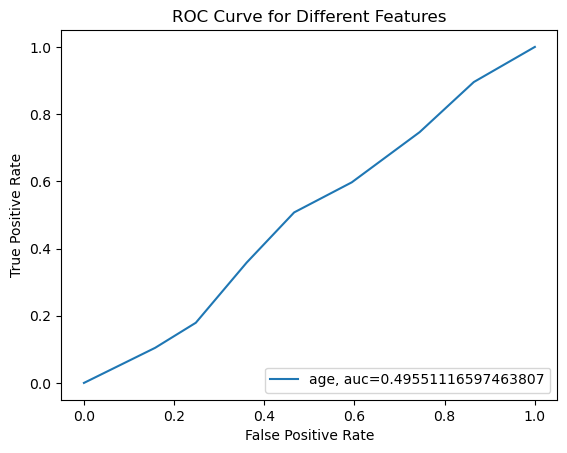

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import metrics

# Example: ROC curve for 'age' feature
X_age = X[['age']]  # Selecting only the 'age' feature
X_train_age, X_test_age, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg_age = LogisticRegression(max_iter=1000) 
logreg_age.fit(X_train_age, y_train)

# Calculate predicted probabilities
y_pred_proba_age = logreg_age.predict_proba(X_test_age)[:, 1]

# Calculate ROC curve and AUC
fpr_age, tpr_age, _ = metrics.roc_curve(y_test,  y_pred_proba_age)
auc_age = metrics.roc_auc_score(y_test, y_pred_proba_age)

# Plot ROC curve for 'age' feature
plt.plot(fpr_age, tpr_age, label="age, auc="+str(auc_age))

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Features')
plt.legend(loc=4)

# Show plot
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("student_spending (1).csv")

# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['year_in_school'] = label_encoder.fit_transform(data['year_in_school'])
data['major'] = label_encoder.fit_transform(data['major'])
data['preferred_payment_method'] = label_encoder.fit_transform(data['preferred_payment_method'])

# Define features and target variable
X = data.drop(columns=['preferred_payment_method'])
y = data['preferred_payment_method']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    epsilon = 1e-15  # Small epsilon value
    cost = -1/m * np.sum(Y*np.log(A + epsilon) + (1-Y)*np.log(1-A + epsilon))
    
    # Backward propagation
    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    return dw, db, cost


def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

def logistic_regression_model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    # Initialize parameters
    w, b = initialize_parameters(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [14]:
# Transpose the data matrices for easier computation
X_train = X_train.T
X_test = X_test.T
y_train = np.array(y_train).reshape(1, -1)
y_test = np.array(y_test).reshape(1, -1)

# Train the logistic regression model
logistic_regression_model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.01)

train accuracy: 33.25 %
test accuracy: 37.0 %


{'costs': [0.6931471805599435,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275,
  -1.3815510557964275],
 'Y_prediction_test': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.17      0.20        87
           1       0.35      0.35      0.35       105
           2       0.35      0.43      0.38       108

    accuracy                           0.33       300
   macro avg       0.31      0.32      0.31       300
weighted avg       0.32      0.33      0.32       300


Logistic Regression Coefficients:
Coefficients: [[-0.01681443  0.01138801  0.01097959  0.09242506 -0.05853903 -0.03673412
  -0.02328056  0.0631758  -0.03347131  0.01432938  0.09932705  0.06177191
   0.00530846  0.03742787  0.04490232  0.03602037 -0.06371323]
 [-0.04686118  0.05941213  0.01593966 -0.06003143  0.01896871 -0.01536714
  -0.02357424  0.01301232 -0.01449675  0.06131753  0.00620098 -0.00734278
   0.14137073  0.01718328 -0.02693115  0.03390254  0.02406881]
 [ 0.06367561 -0.07080014 -0.02691926 -0.03239363  0.03957032  0.05210126
   0.0468548  -0.07618812  0.04796806 -0.07564691 -

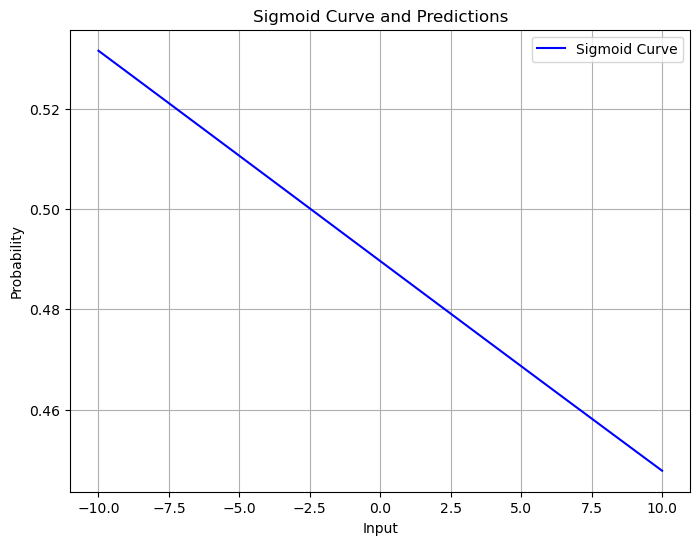

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

# Load the dataset
data = pd.read_csv("student_spending (1).csv")

# Encoding categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['year_in_school'] = label_encoder.fit_transform(data['year_in_school'])
data['major'] = label_encoder.fit_transform(data['major'])
data['preferred_payment_method'] = label_encoder.fit_transform(data['preferred_payment_method'])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns=['preferred_payment_method'])
y = data['preferred_payment_method']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Generate predictions
y_pred = logistic_model.predict(X_test_scaled)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate logistic regression coefficients
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_
print("\nLogistic Regression Coefficients:")
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x_values = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the sigmoid function
y_values = sigmoid(coefficients[0][0] * x_values + intercept[0])

# Plot sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color='blue', label='Sigmoid Curve')


plt.title('Sigmoid Curve and Predictions')
plt.xlabel('Input')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

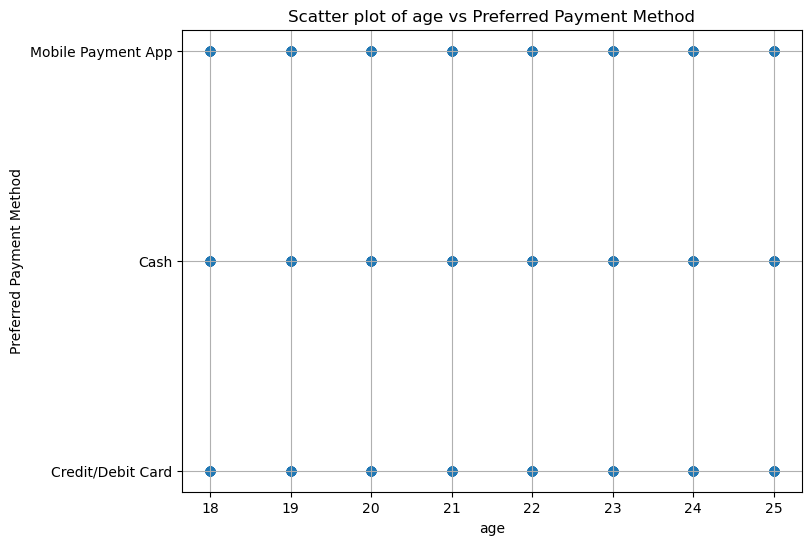

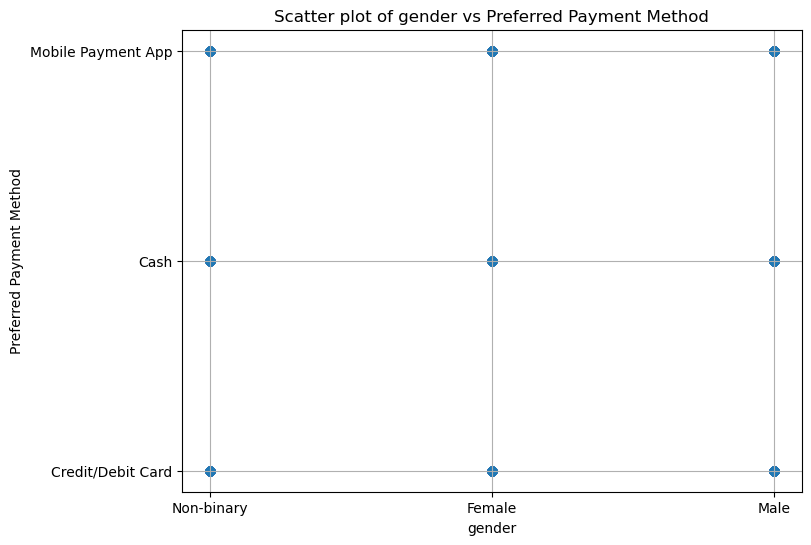

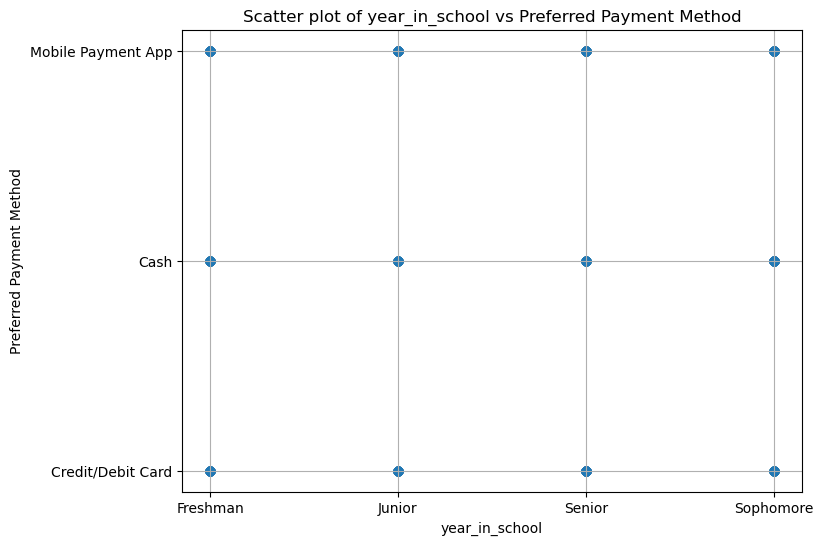

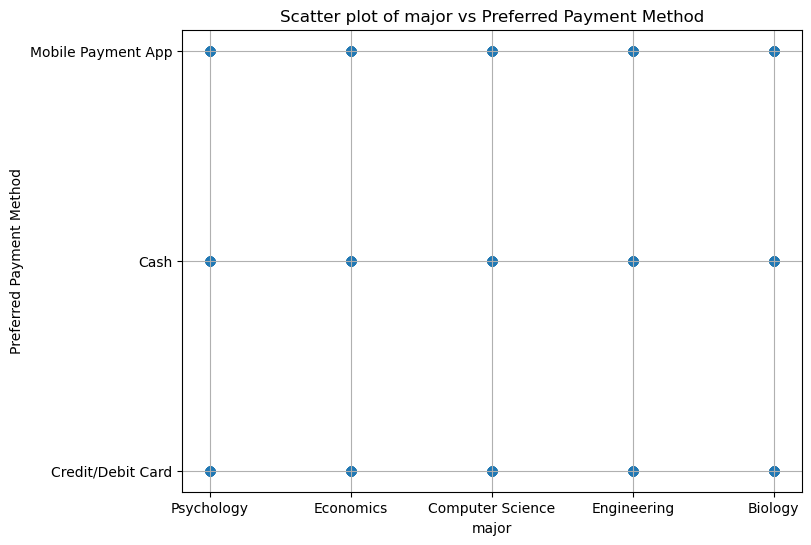

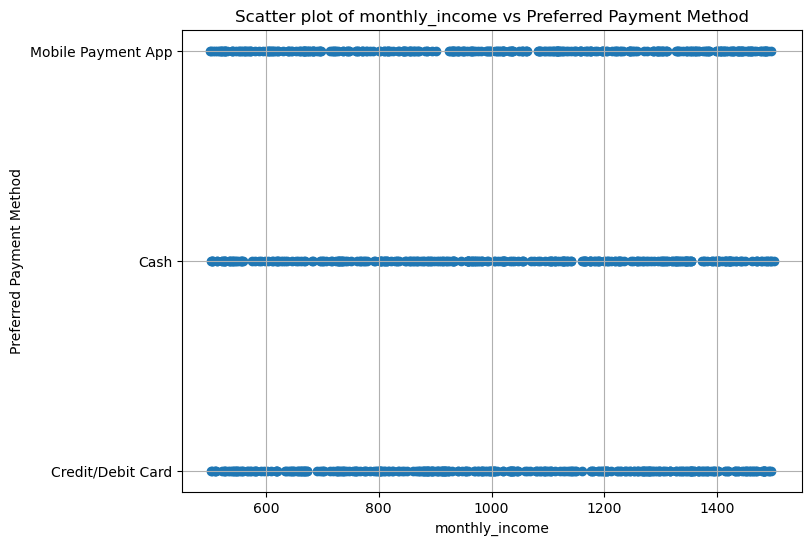

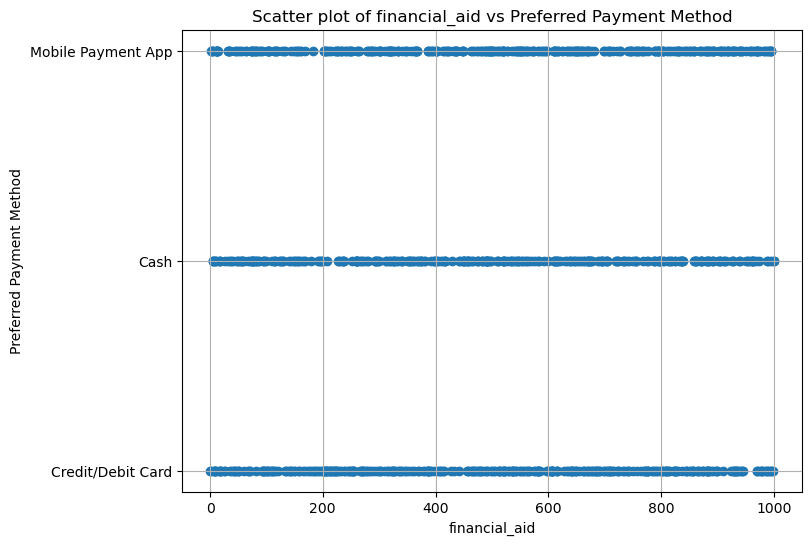

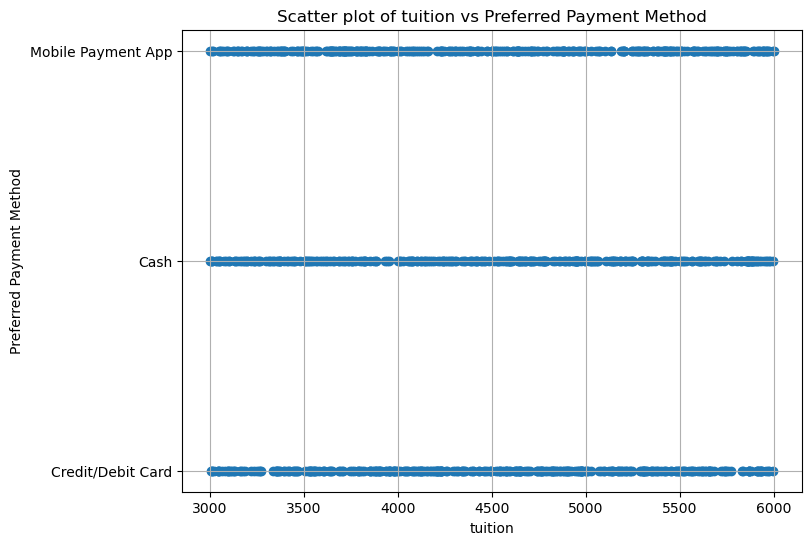

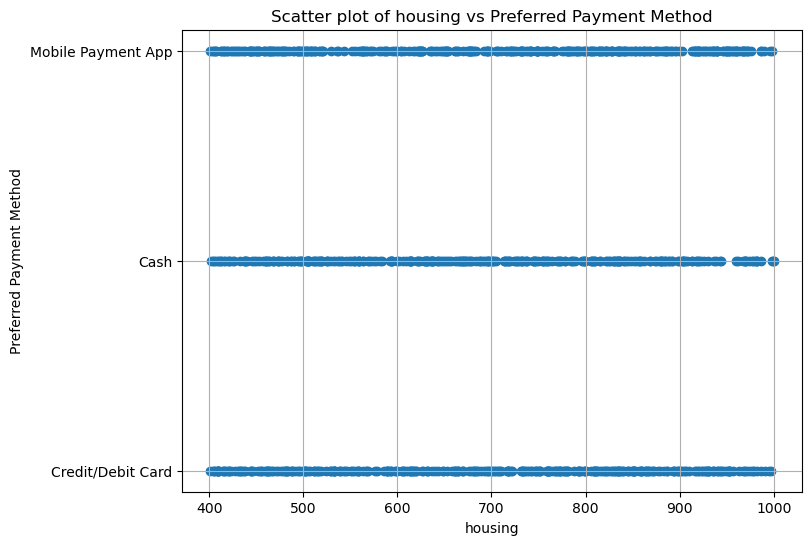

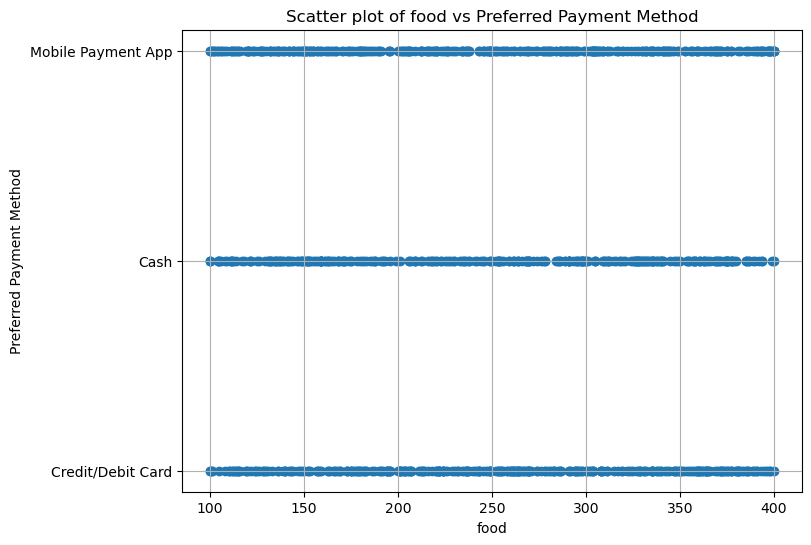

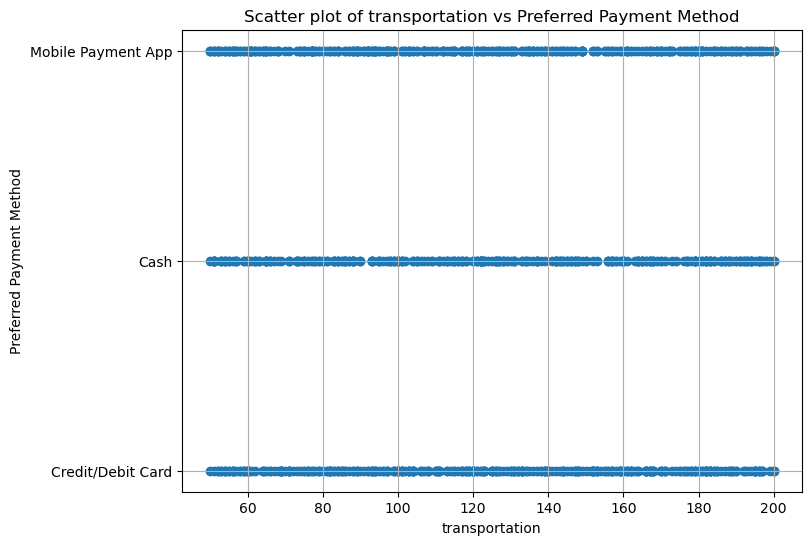

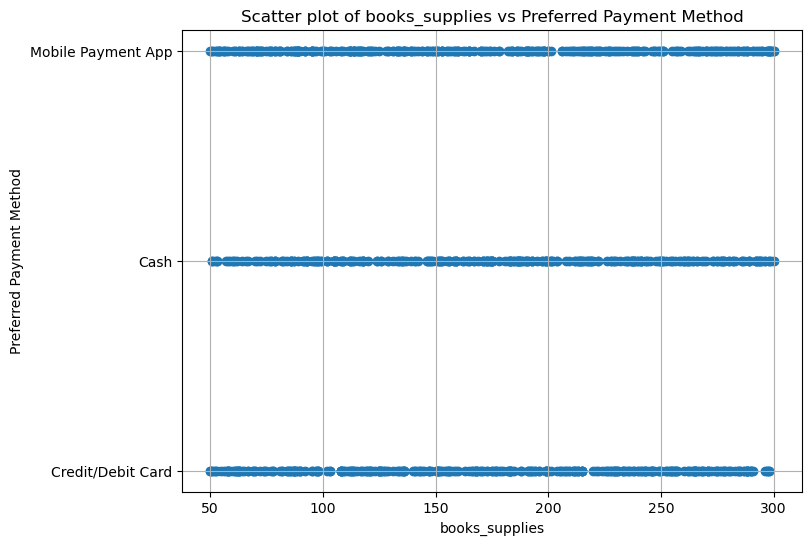

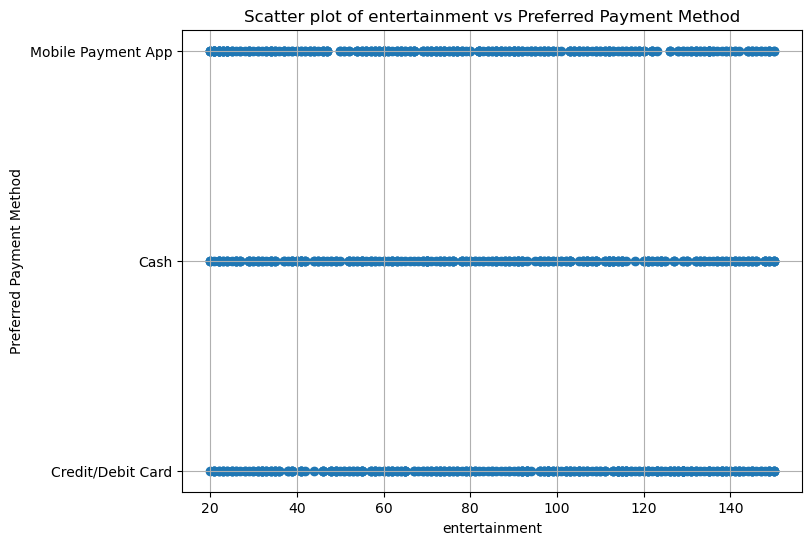

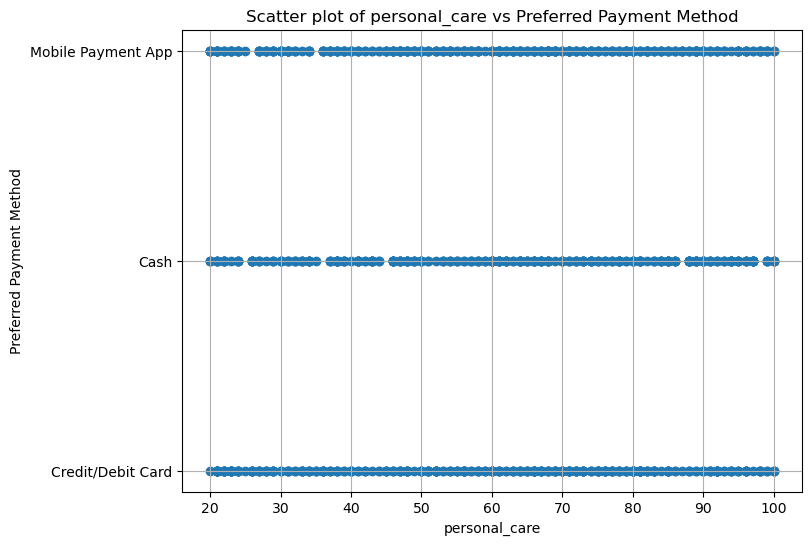

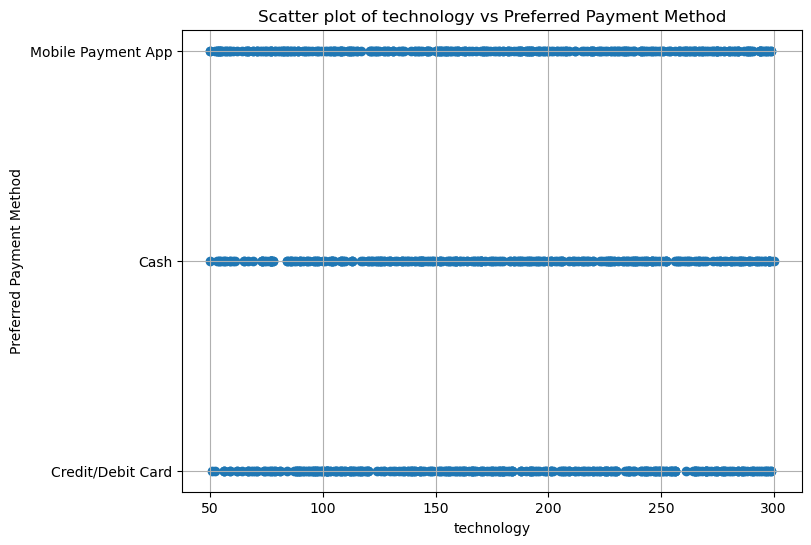

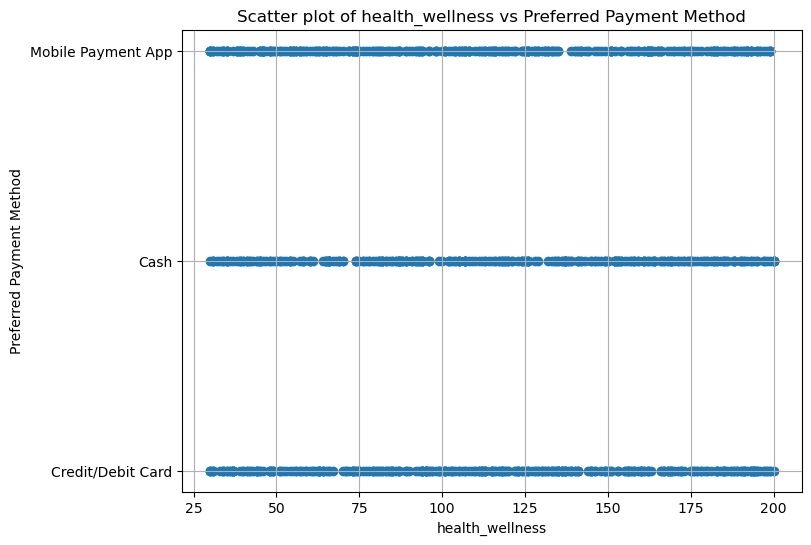

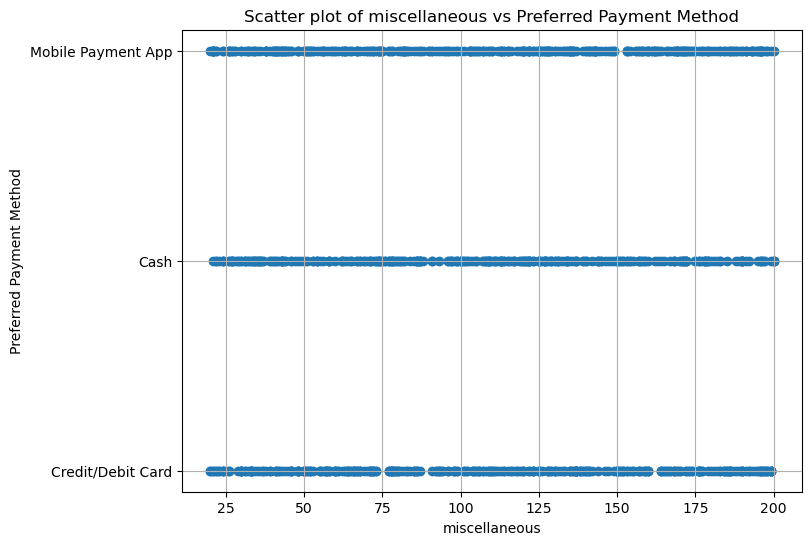

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student_spending (1).csv")

# List of features
features = ['age', 'gender', 'year_in_school', 'major', 'monthly_income', 'financial_aid', 'tuition', 'housing', 
            'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 
            'health_wellness', 'miscellaneous']

# Plot each feature against the preferred payment method
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['preferred_payment_method'])
    plt.title(f'Scatter plot of {feature} vs Preferred Payment Method')
    plt.xlabel(feature)
    plt.ylabel('Preferred Payment Method')
    plt.grid(True)
    plt.show()

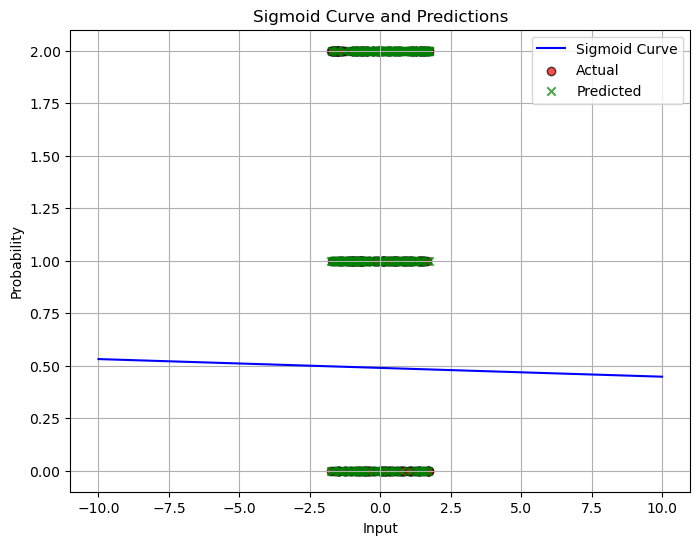

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("student_spending (1).csv")

# Encoding categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['year_in_school'] = label_encoder.fit_transform(data['year_in_school'])
data['major'] = label_encoder.fit_transform(data['major'])
data['preferred_payment_method'] = label_encoder.fit_transform(data['preferred_payment_method'])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns=['preferred_payment_method'])
y = data['preferred_payment_method']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Generate predictions
y_pred = logistic_model.predict(X_test_scaled)

# Plot sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x_values = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the sigmoid function
y_values = sigmoid(logistic_model.coef_[0][0] * x_values + logistic_model.intercept_[0])

# Plot sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color='blue', label='Sigmoid Curve')

# Scatter plot for actual values
plt.scatter(X_test_scaled[:, 0], y_test, color='red', label='Actual', marker='o', edgecolor='black', alpha=0.7)

# Scatter plot for predicted values
plt.scatter(X_test_scaled[:, 0], y_pred, color='green', label='Predicted', marker='x', alpha=0.7)

plt.title('Sigmoid Curve and Predictions')
plt.xlabel('Input')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

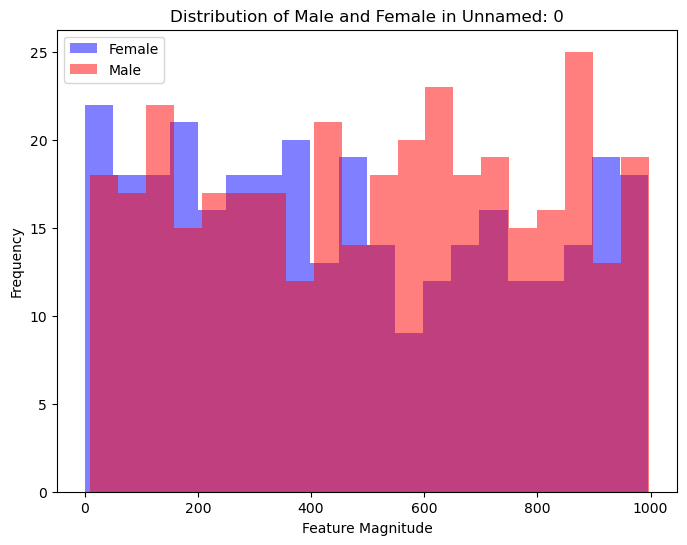

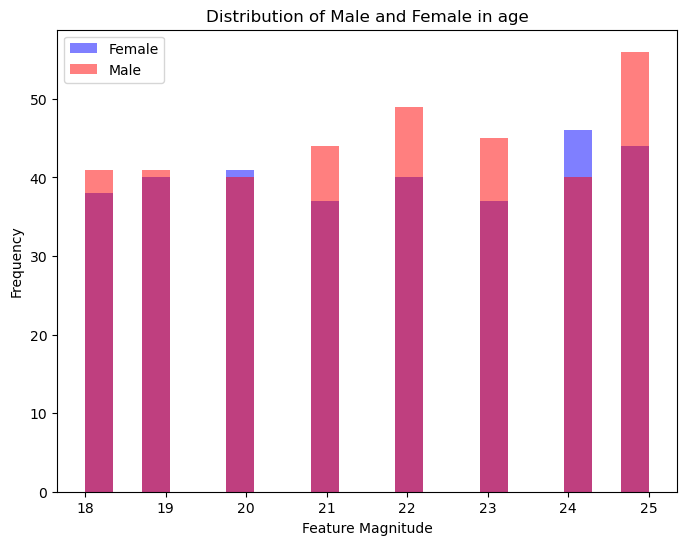

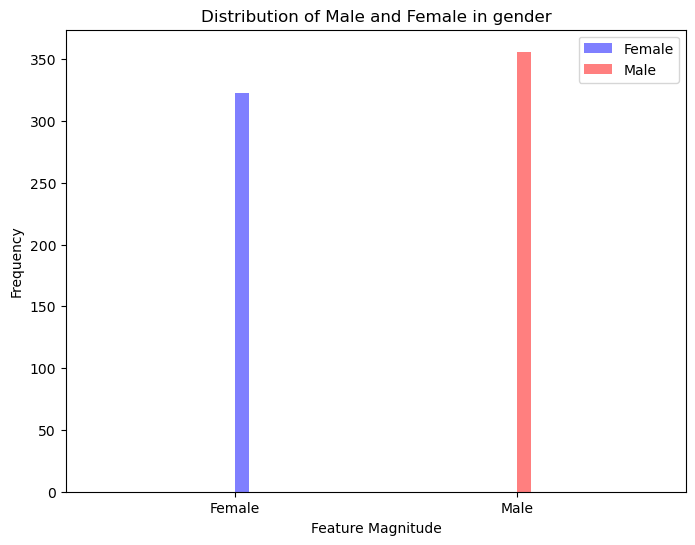

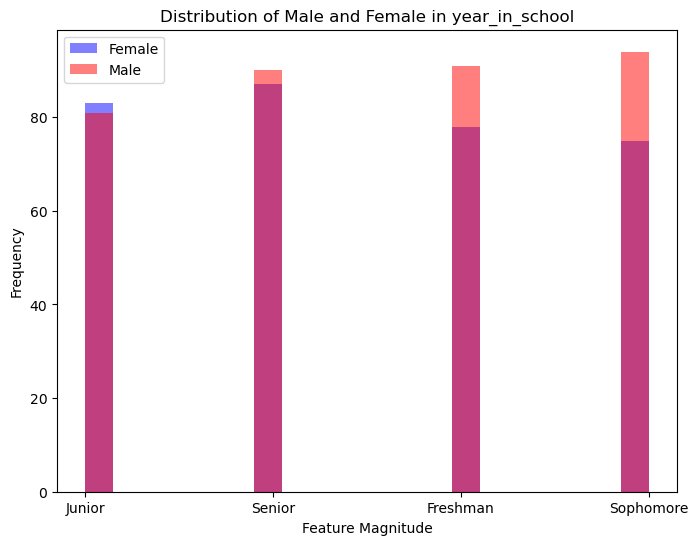

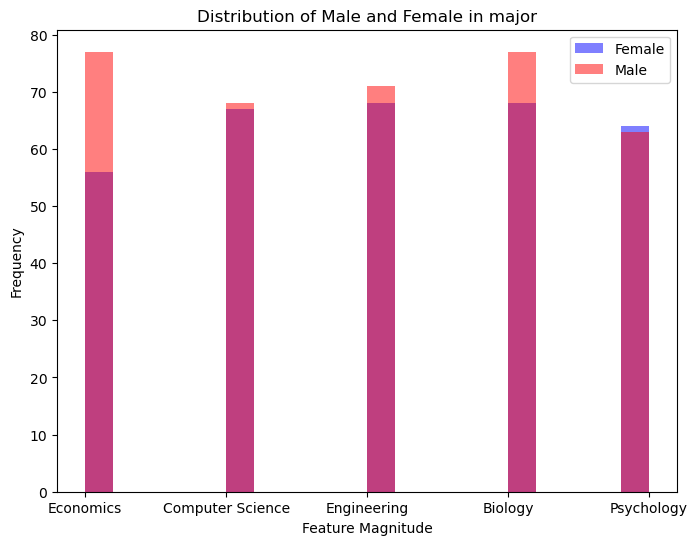

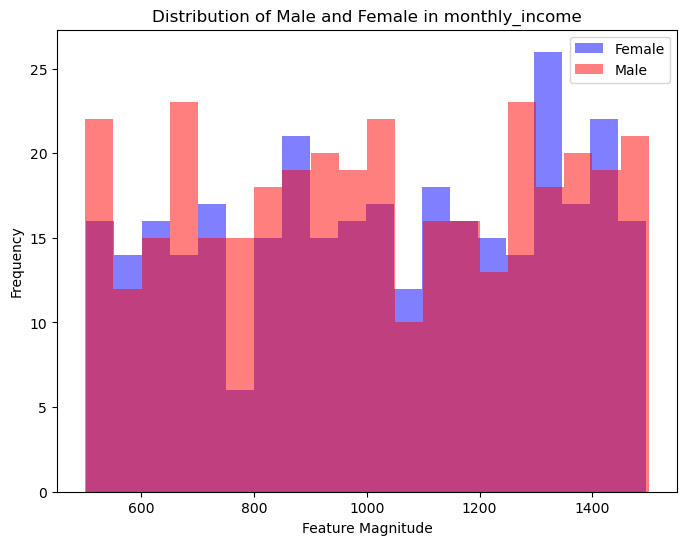

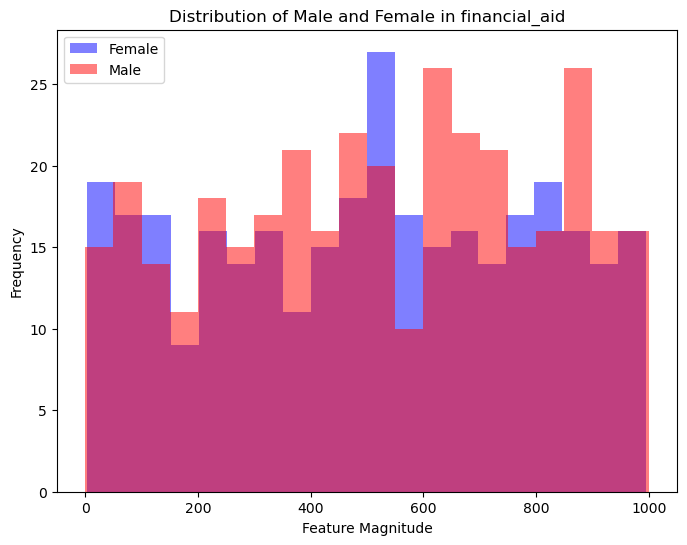

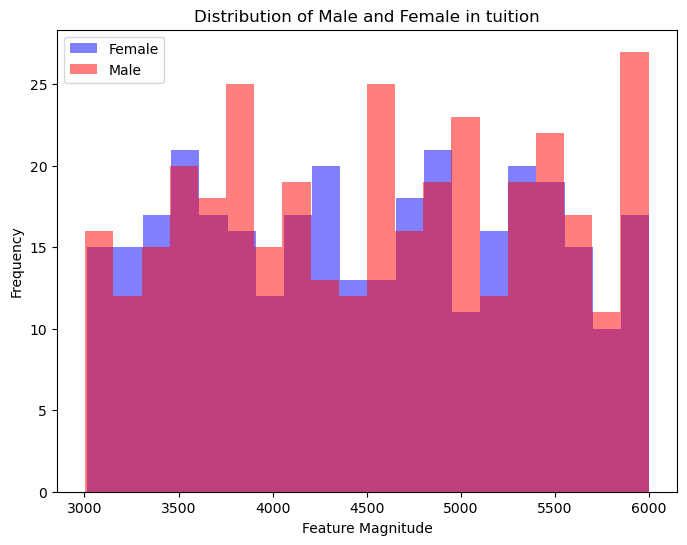

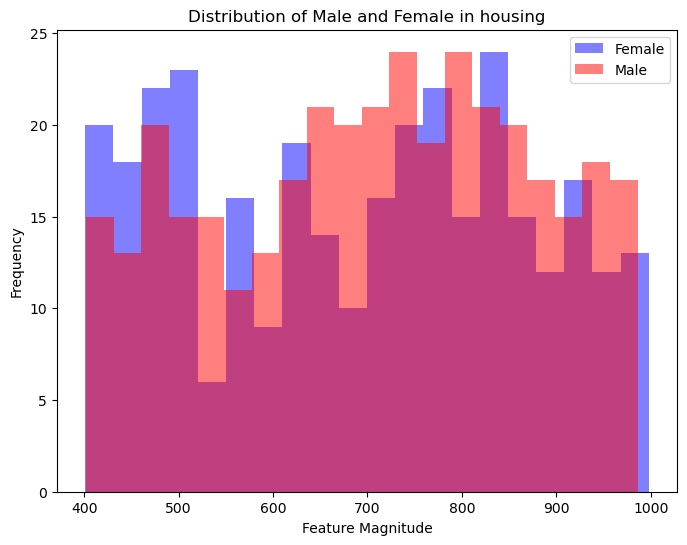

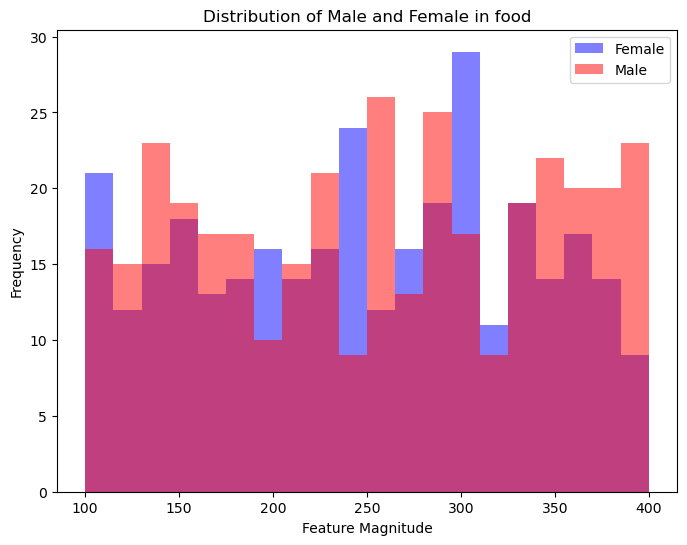

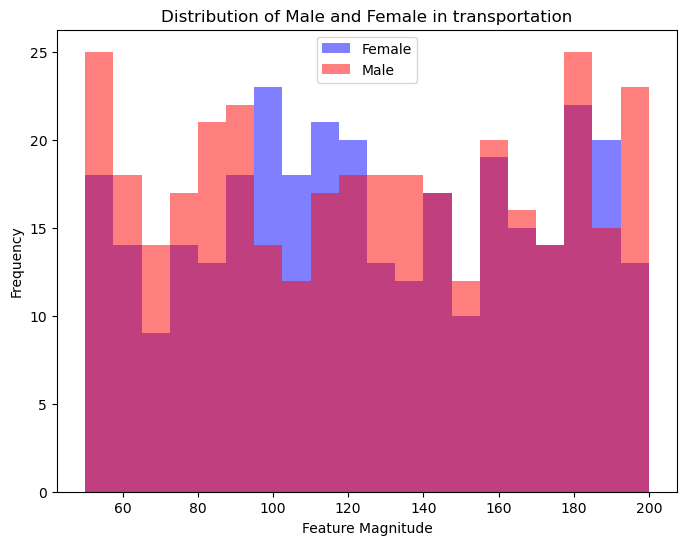

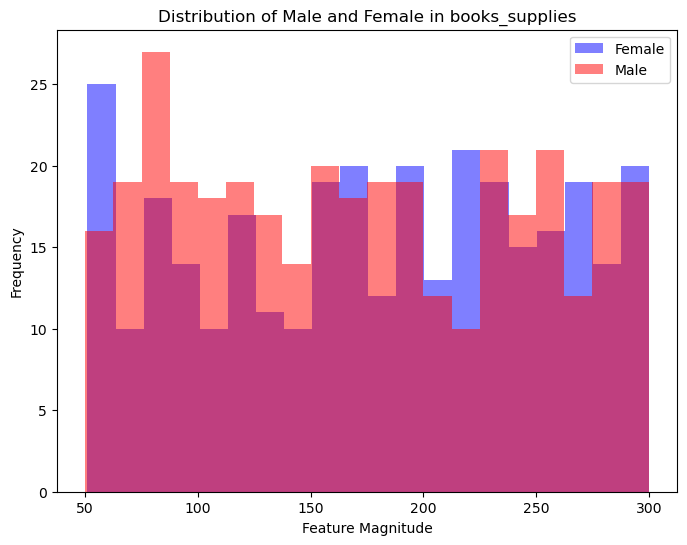

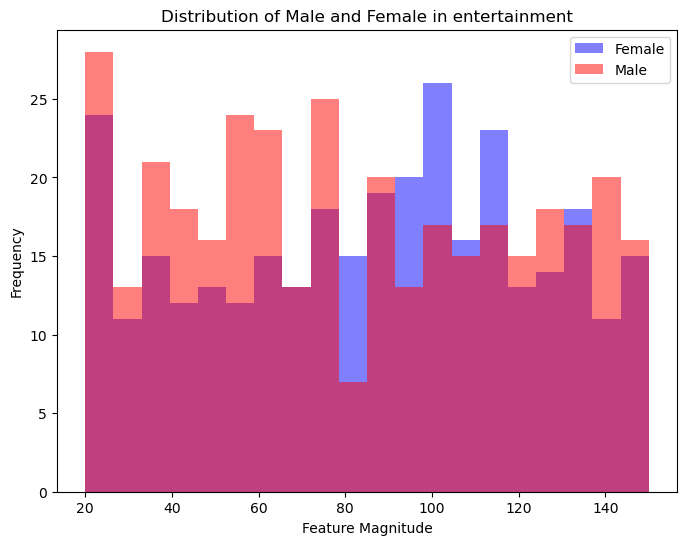

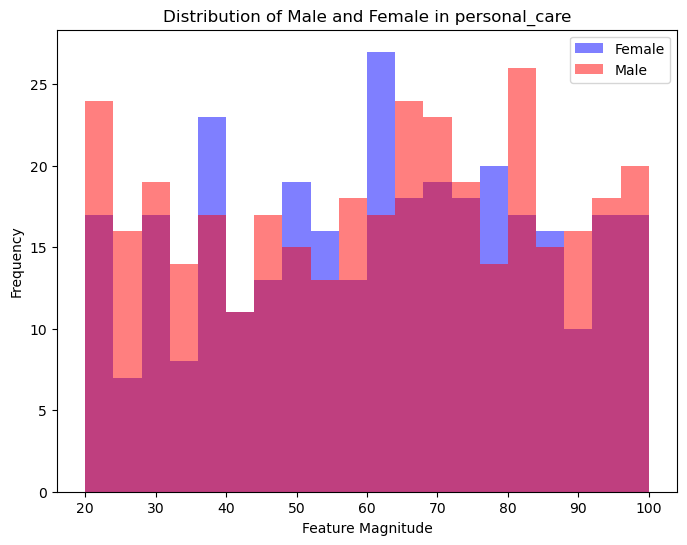

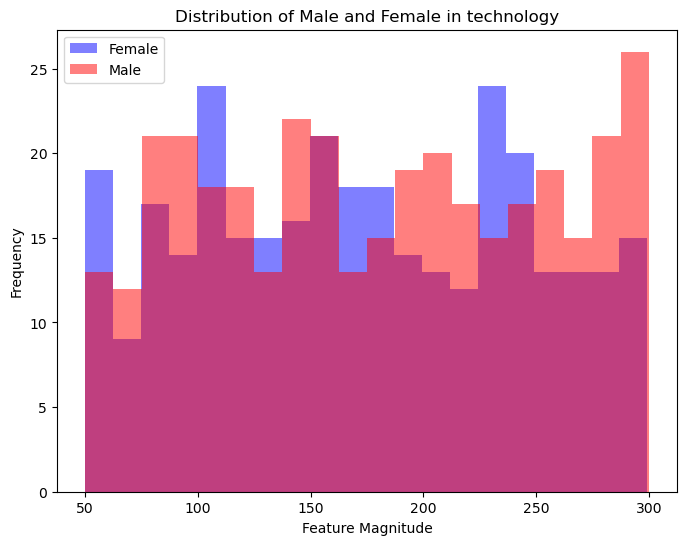

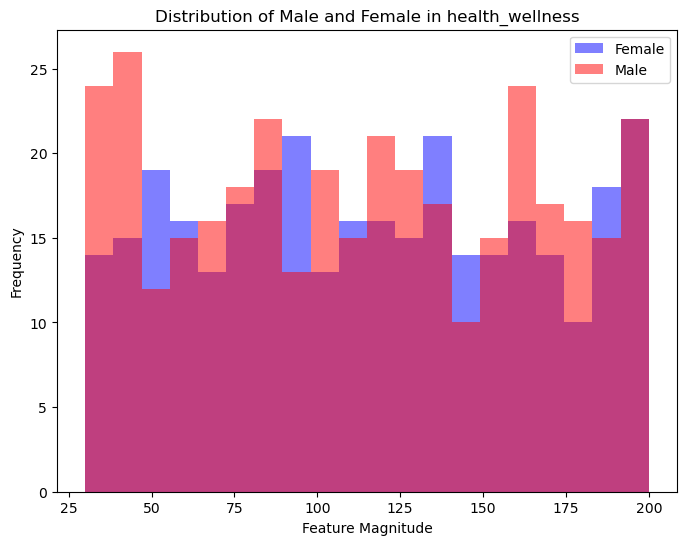

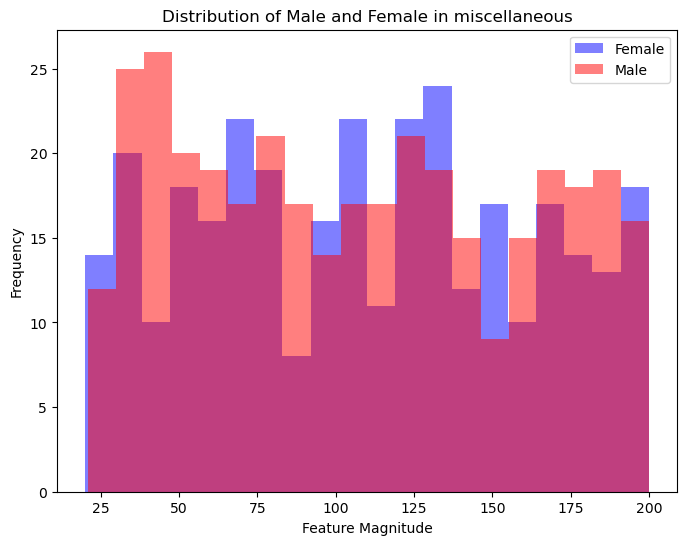

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("student_spending (1).csv")

# Check the distribution of male and female in each feature column
for col in data.columns:
    if col != 'preferred_payment_method':  # Exclude the target variable column
        plt.figure(figsize=(8, 6))
        plt.hist(data.loc[data['gender'] == 'Female', col], color='blue', alpha=0.5, label="Female", bins=20)
        plt.hist(data.loc[data['gender'] == 'Male', col], color='red', alpha=0.5, label="Male", bins=20)
        plt.title(f"Distribution of Male and Female in {col}")
        plt.xlabel("Feature Magnitude")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

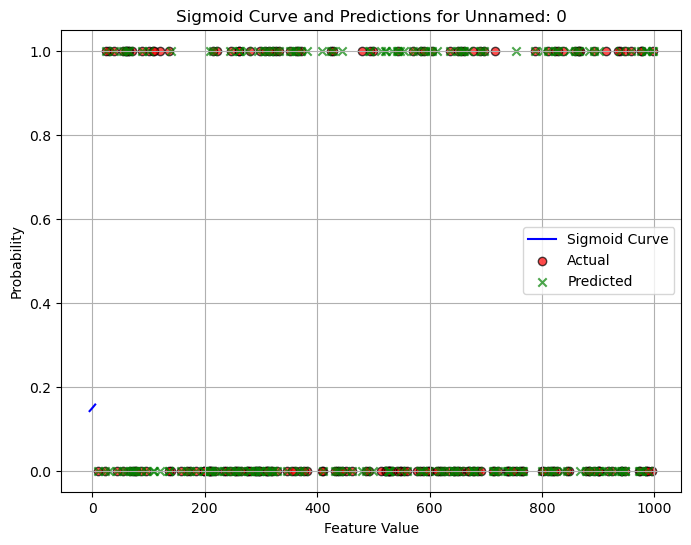

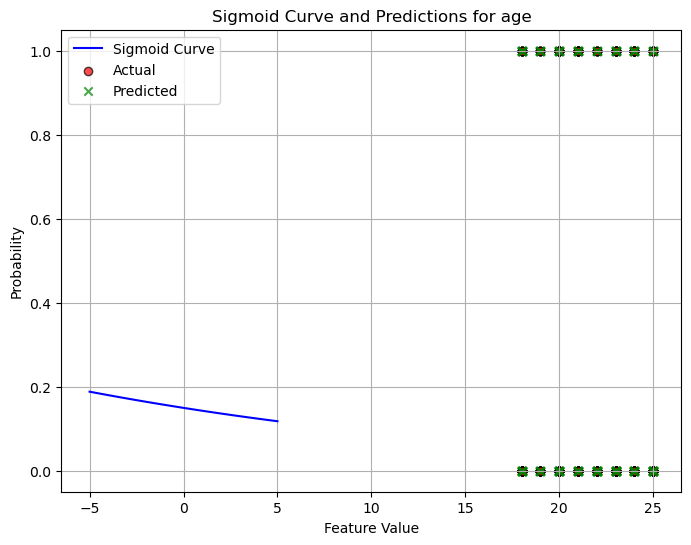

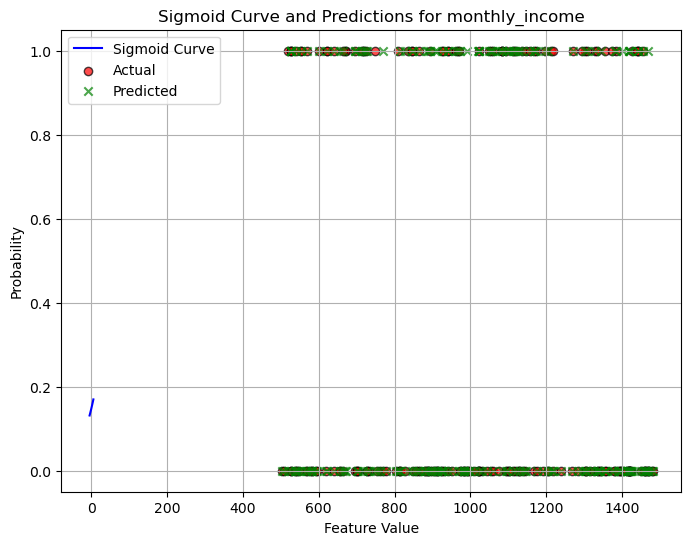

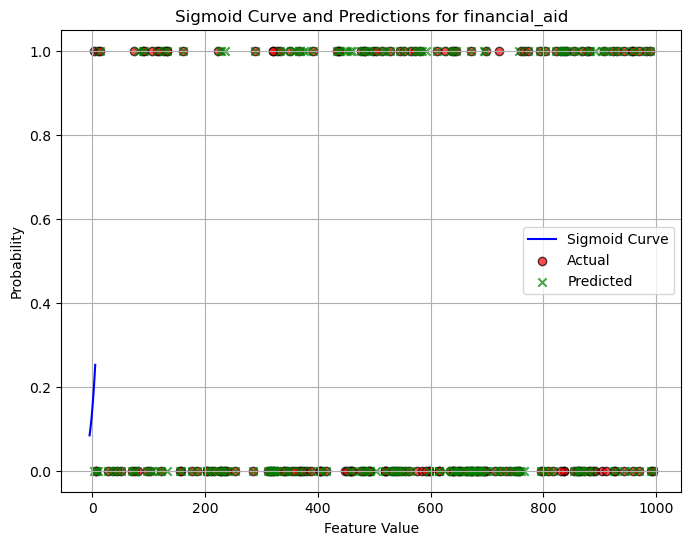

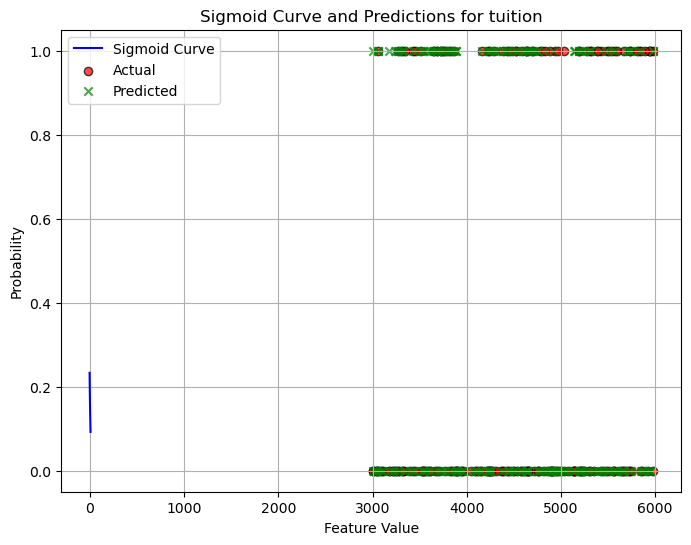

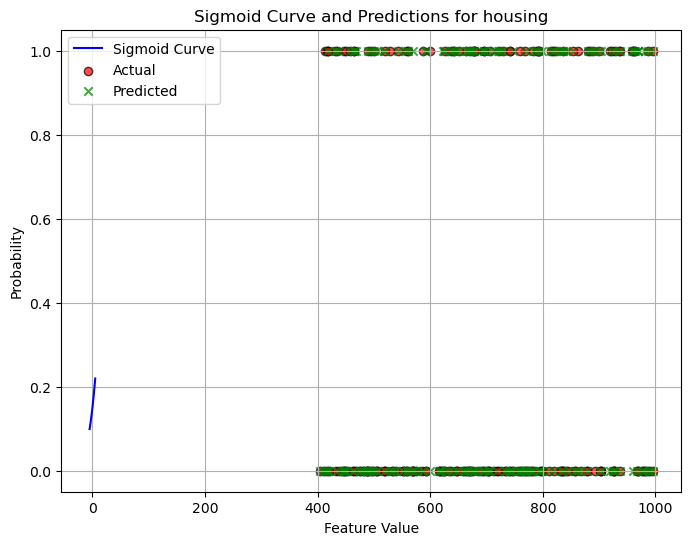

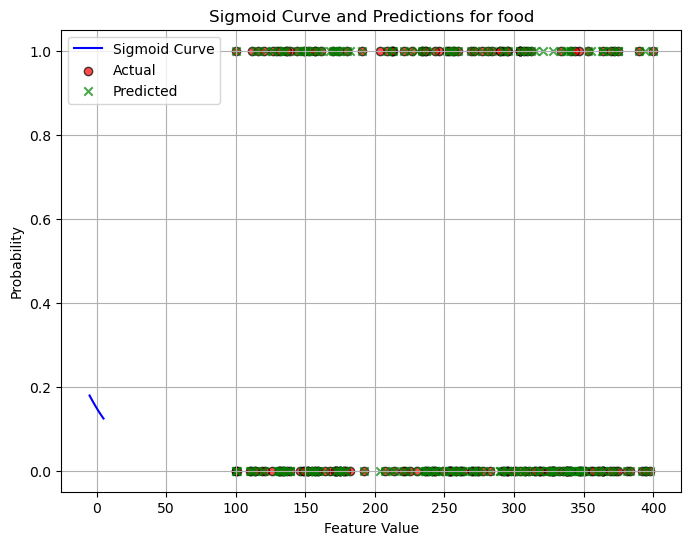

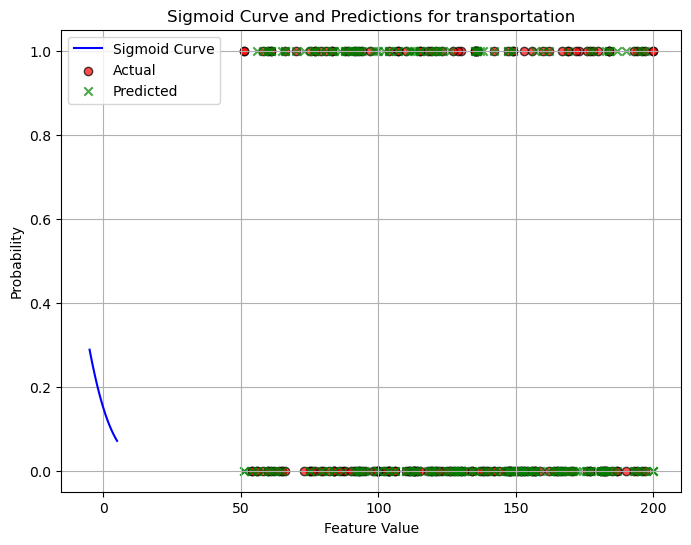

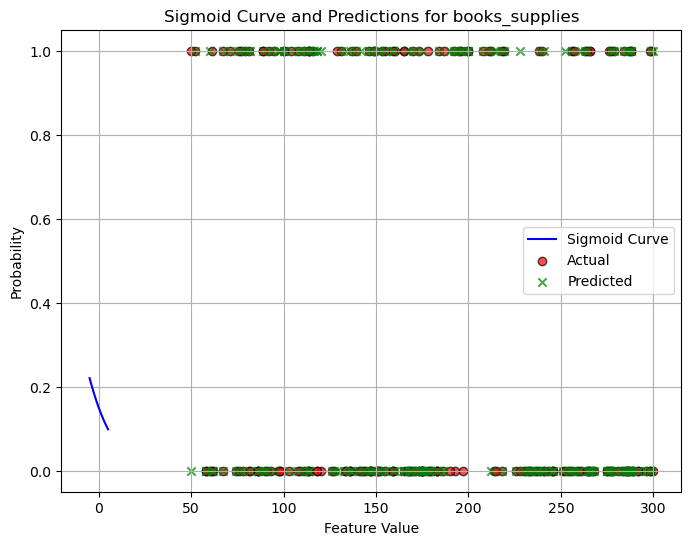

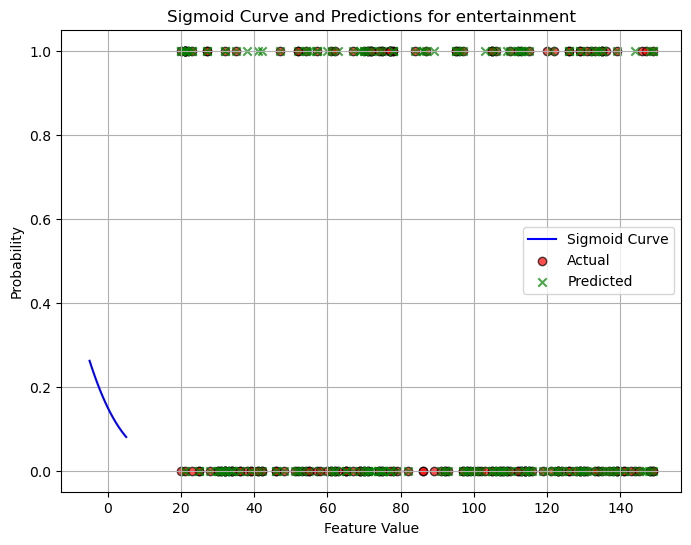

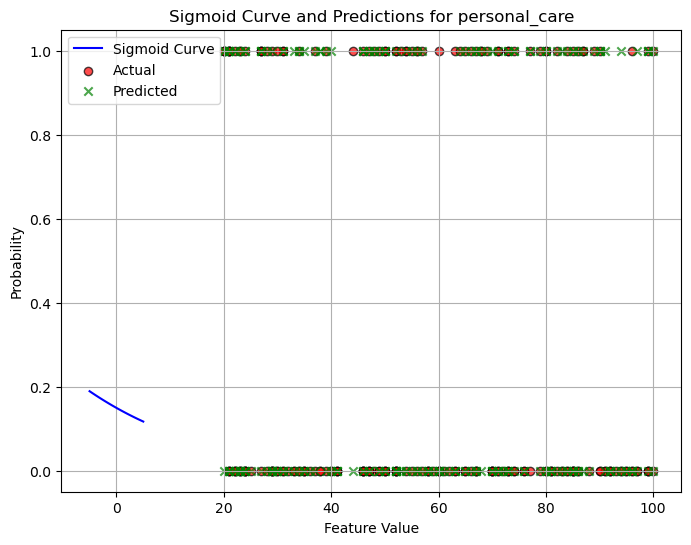

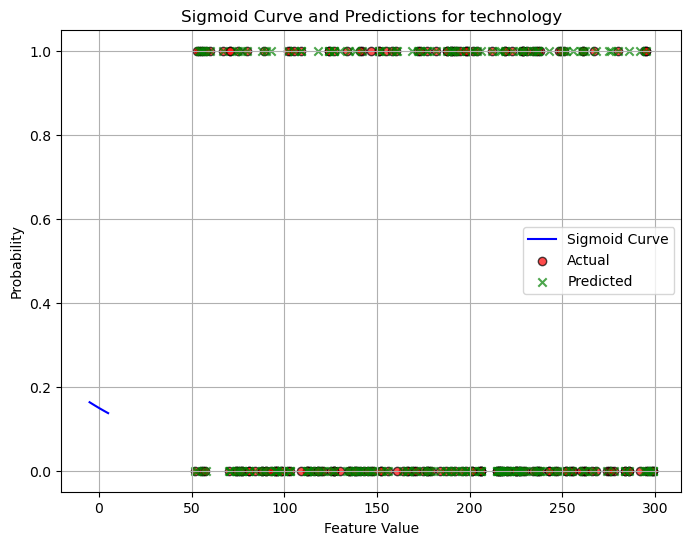

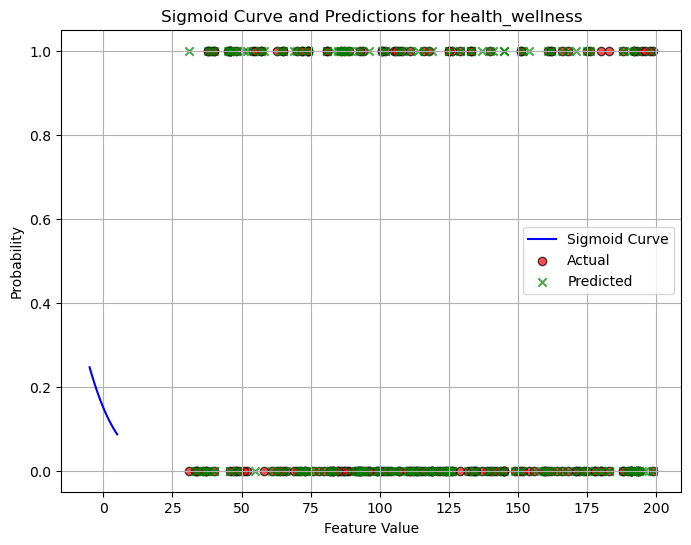

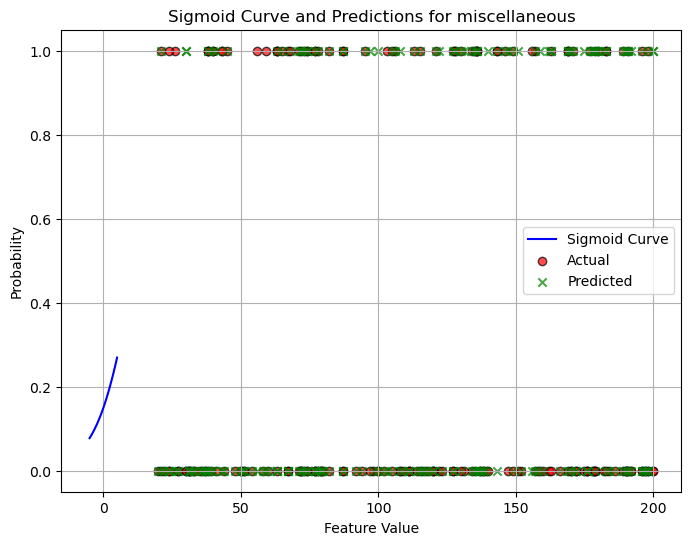

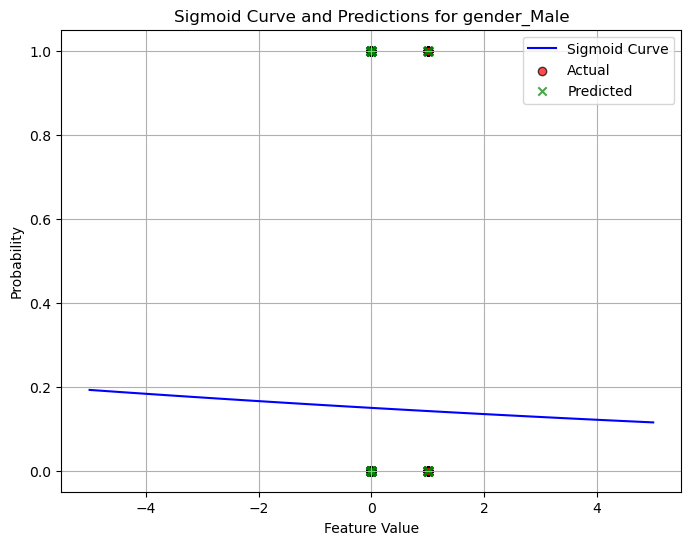

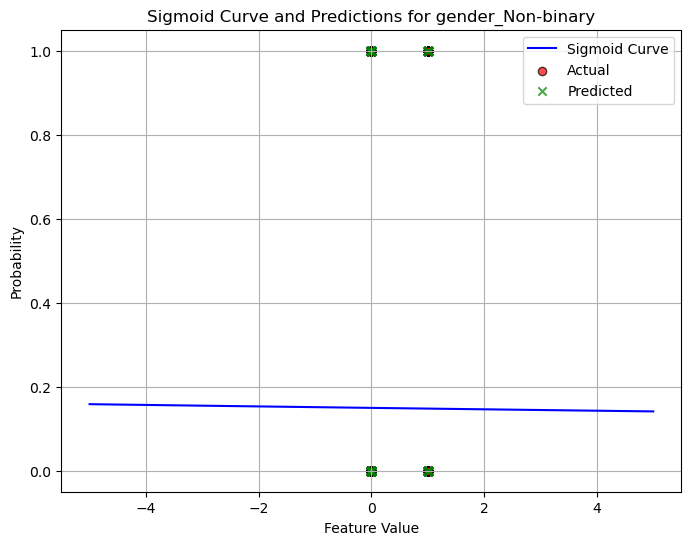

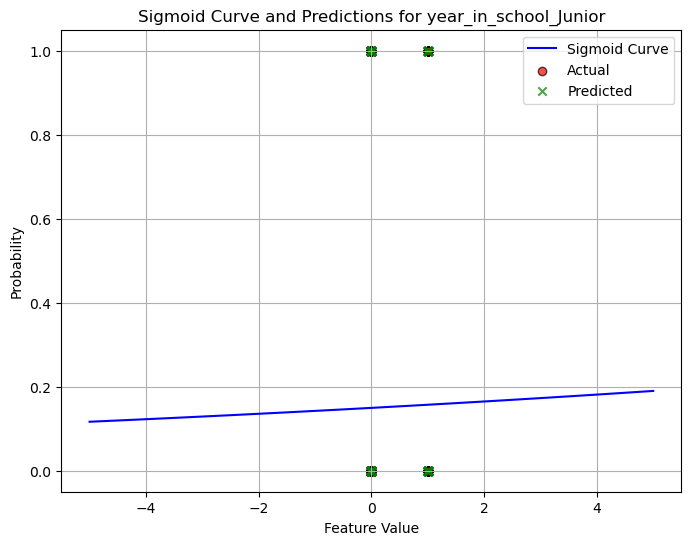

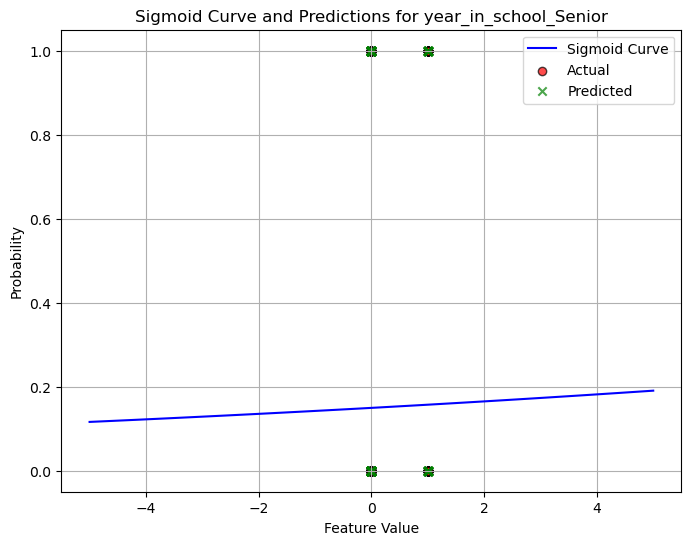

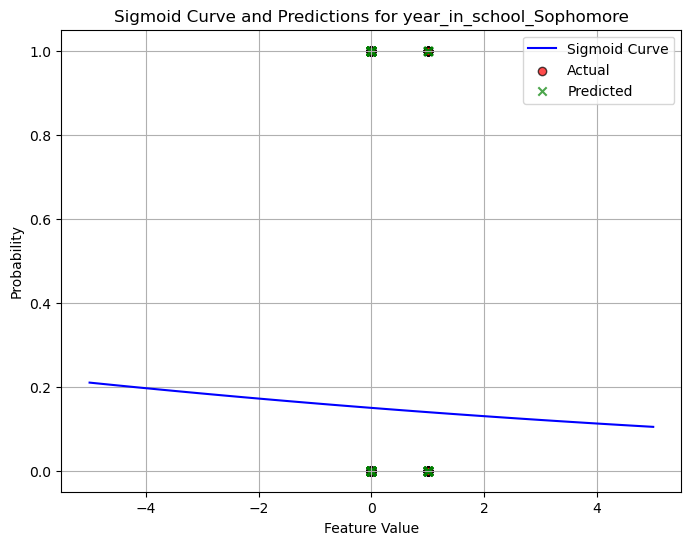

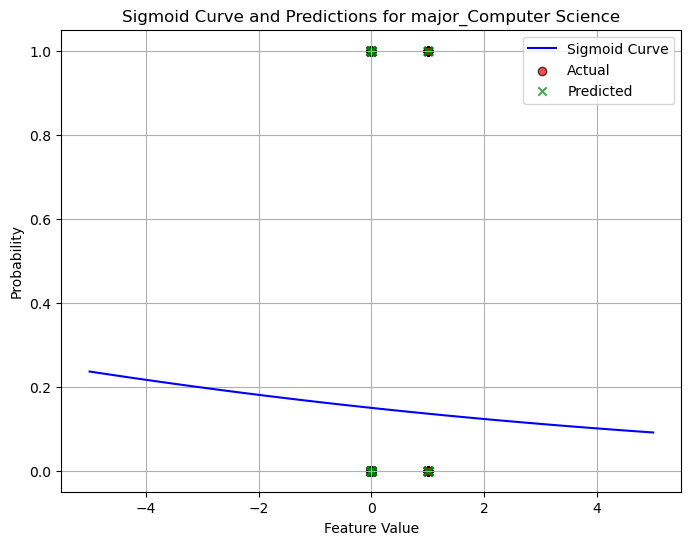

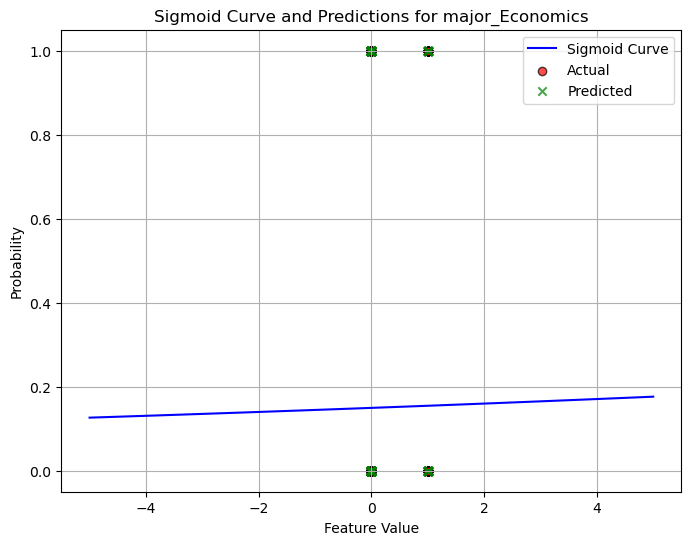

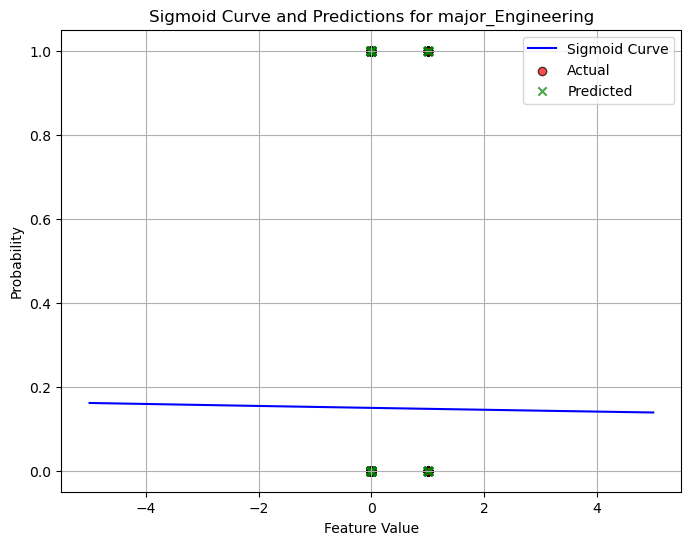

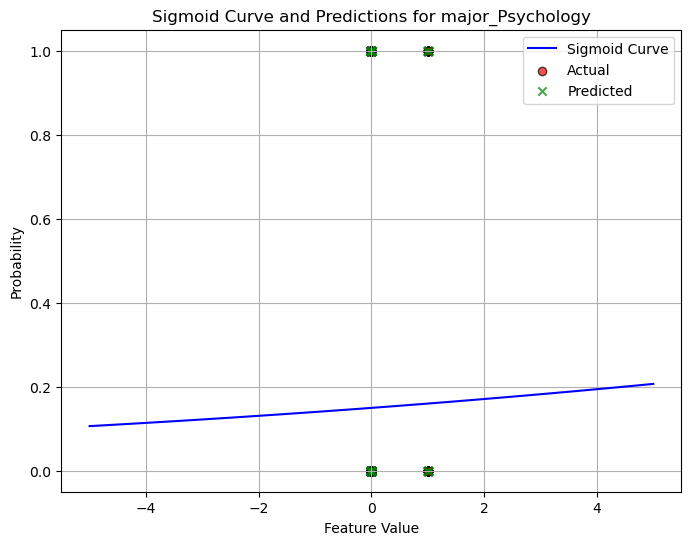

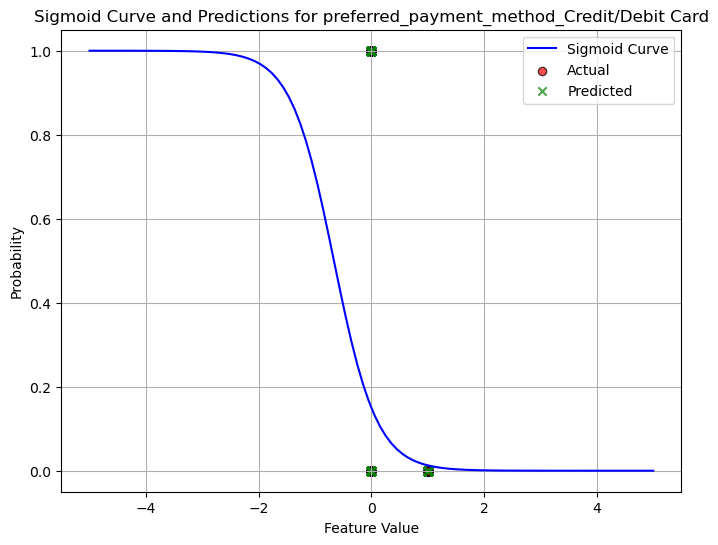

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("student_spending (1).csv")

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop(columns=['preferred_payment_method_Mobile Payment App'])  # Drop one of the dummy variables to avoid multicollinearity
y = data['preferred_payment_method_Mobile Payment App']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Generate predictions
y_pred = logistic_model.predict(X_test_scaled)

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot sigmoid curve for each feature
for col in X.columns:
    # Generate values for x
    x_values = np.linspace(-5, 5, 100)
    
    # Calculate corresponding y values using the sigmoid function
    y_values = sigmoid(logistic_model.coef_[0][X.columns.get_loc(col)] * x_values + logistic_model.intercept_[0])

    # Plot sigmoid curve
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, color='blue', label='Sigmoid Curve')

    # Scatter plot for actual values
    plt.scatter(X_test[col], y_test, color='red', label='Actual', marker='o', edgecolor='black', alpha=0.7)

    # Scatter plot for predicted values
    plt.scatter(X_test[col], y_pred, color='green', label='Predicted', marker='x', alpha=0.7)

    
    plt.title(f'Sigmoid Curve and Predictions for {col}')
    plt.xlabel('Feature Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("student_spending (1).csv")

# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['year_in_school'] = label_encoder.fit_transform(data['year_in_school'])
data['major'] = label_encoder.fit_transform(data['major'])
data['preferred_payment_method'] = label_encoder.fit_transform(data['preferred_payment_method'])

# Define features and target variable
X = data.drop(columns=['preferred_payment_method'])
y = data['preferred_payment_method']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    epsilon = 1e-5  # Small value to prevent division by zero or taking logarithm of zero
    cost = -1/m * np.sum(Y*np.log(A + epsilon) + (1-Y)*np.log(1-A + epsilon))
    
    # Backward propagation
    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    return dw, db, cost

def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

def logistic_regression_model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    # Initialize parameters
    w, b = initialize_parameters(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("Train accuracy: {} %".format(train_accuracy))
    print("Test accuracy: {} %".format(test_accuracy))

    return {"costs": costs,
            "Y_prediction_test": Y_prediction_test, 
            "Y_prediction_train": Y_prediction_train, 
            "w": w, 
            "b": b,
            "learning_rate": learning_rate,
            "num_iterations": num_iterations}

# Transpose the data matrices for easier computation
X_train = X_train.T
X_test = X_test.T
y_train = np.array(y_train).reshape(1, -1)
y_test = np.array(y_test).reshape(1, -1)

# Train the logistic regression model
logistic_regression_model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.01)

Train accuracy: 33.25 %
Test accuracy: 37.0 %


{'costs': [0.6931271807599427,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094,
  -0.4605274185468094],
 'Y_prediction_test': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,